Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



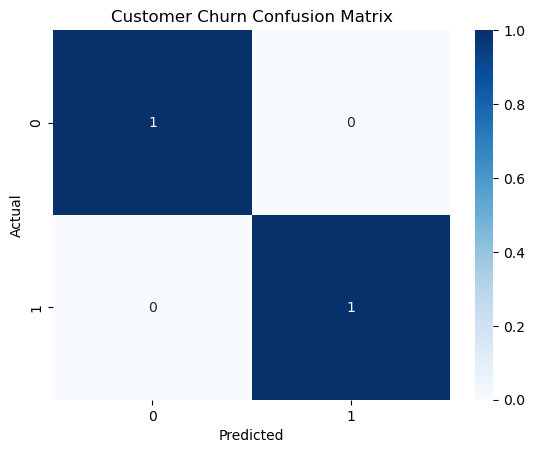

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
df = pd.read_csv("cutomerchurn.csv")

# Encode categorical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Contract_Type'] = df['Contract_Type'].map({'Monthly': 0, 'Yearly': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Features & target
X = df[['Age', 'Gender', 'Monthly_Spend', 'Contract_Type', 'Tenure_Months']]
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Customer Churn Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()